## implementation of Agglomerative Clustering Algorithm

In [74]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score,silhouette_score
import matplotlib.pyplot as plt


In [59]:
iris = load_iris()

In [60]:
X = iris.data
y=iris.target


In [61]:
X.shape

(150, 4)

In [62]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
df = pd.DataFrame(X,columns=iris.feature_names)
df['target']=y

In [64]:
df['species']=df['target'].apply(lambda x:iris.target_names[x])

In [65]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [66]:
X = df.drop('species',axis=1)
y = df['species']

In [67]:
le = LabelEncoder()
y_true = le.fit_transform(y)

In [68]:
aggC = AgglomerativeClustering(n_clusters=3,linkage='complete')
y_pred_agg = aggC.fit_predict(X)

In [69]:
kmean = KMeans(n_clusters=3,random_state=42,n_init=10)
y_pred_knn = kmean.fit_predict(X)

In [71]:
ari_agg = adjusted_rand_score(y_pred_agg,y_true)
ari_kmean = adjusted_rand_score(y_pred_knn,y_true)
sil_agg = silhouette_score(X,y_pred_agg)
sil_kmean = silhouette_score(X,y_pred_knn)

In [72]:
print("=======Agglomerative Clustering==========")
print(f"Adjusted rand index : {ari_agg:.3f}")
print(f"silhouette_score : {sil_agg:.3f}")

=======Agglomerative Clustering==========
Adjusted rand index : 0.732
silhouette_score : 0.558


In [73]:
print("======Kmeans clustering========")
print(f"adjusted_rand_score : {ari_kmean:.3f}")
print(f"silhouette_score : {sil_kmean:.3f}")

======Kmeans clustering========
adjusted_rand_score : 0.980
silhouette_score : 0.582


In [75]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

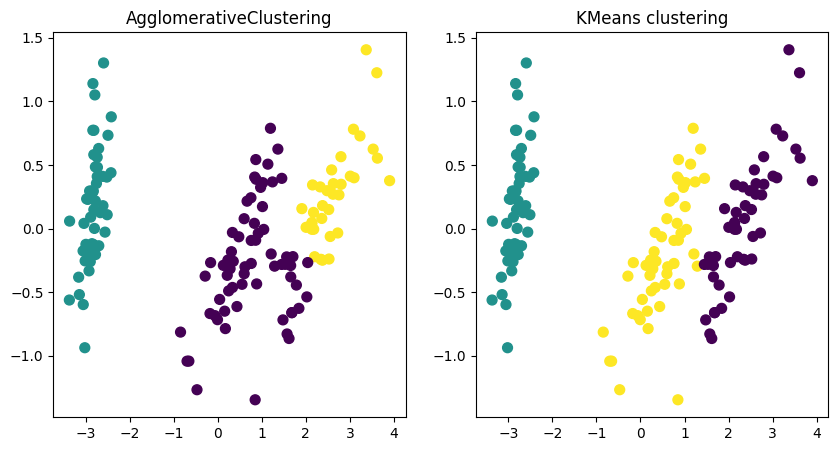

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred_agg,cmap='viridis',s=50)
plt.title("AgglomerativeClustering")
plt.subplot(1,2,2)
plt.scatter(x_pca[:,0],[x_pca[:,1]],c=y_pred_knn,cmap='viridis',s=50)
plt.title("KMeans clustering")
plt.show()